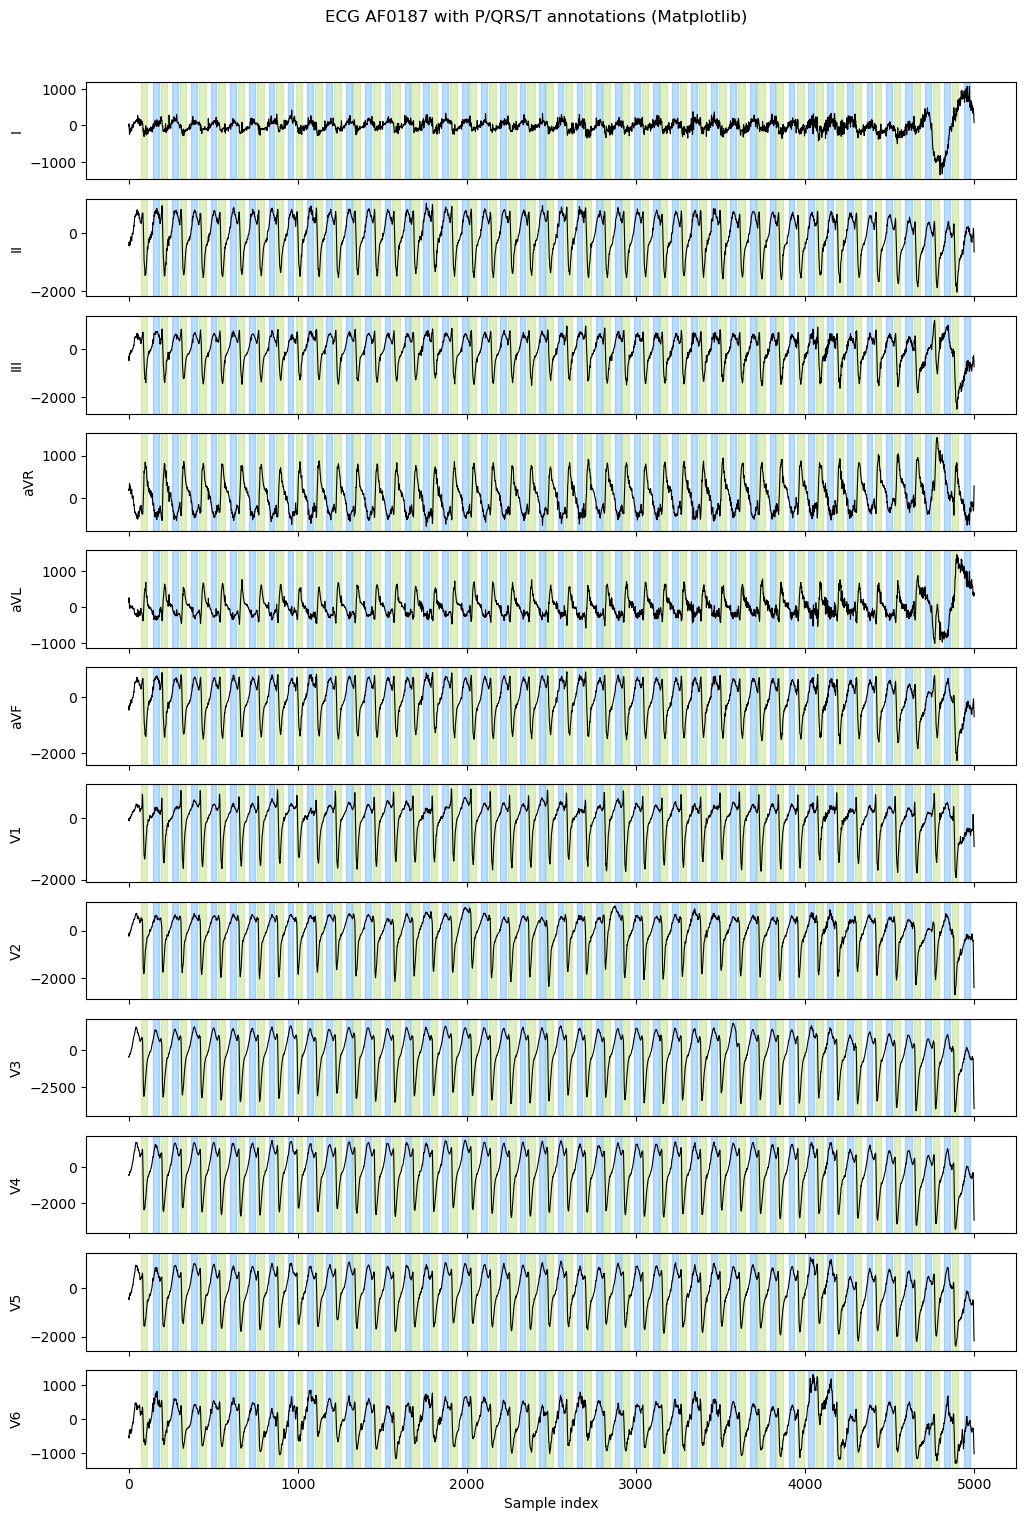

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_ecg_all_leads(record_id, data_dir_csv, data_dir_ann):
    fs = 500  # Hz
    sig_path = os.path.join(data_dir_csv, f"{record_id}.csv")
    sig = pd.read_csv(sig_path, header=None)

    leads = ["I", "II", "III", "aVR", "aVL", "aVF",
             "V1", "V2", "V3", "V4", "V5", "V6"]

    lead_to_suffix = {
        "I": "i", "II": "ii", "III": "iii",
        "aVR": "avr", "aVL": "avl", "aVF": "avf",
        "V1": "v1", "V2": "v2", "V3": "v3",
        "V4": "v4", "V5": "v5", "V6": "v6"
    }

    fig, axes = plt.subplots(12, 1, figsize=(12, 18), sharex=True)

    for i, lead in enumerate(leads):
        axes[i].plot(sig[i], linewidth=0.8, color="black")
        axes[i].set_ylabel(lead)

        suffix = lead_to_suffix[lead]
        anno_file = os.path.join(data_dir_ann, f"{record_id}.{suffix}.txt")

        if os.path.exists(anno_file):
            anno = pd.read_csv(
                anno_file, skiprows=1, header=None,
                names=["type", "start", "end"],
                #dtype={"type": int, "start": int, "end": int}
            )
            colors = {0: "#FFD700", 1: "#9ACD32", 2: "#1E90FF"}
            for _, row in anno.iterrows():
                axes[i].axvspan(row["start"], row["end"],
                                alpha=0.3, color=colors.get(row["type"], "gray"))

    plt.suptitle(f"ECG {record_id} with P/QRS/T annotations (Matplotlib)", y=0.92)
    plt.xlabel("Sample index")
    plt.show()


# Example usage
plot_ecg_all_leads(
    "AF0187",
    "/mnt/c/Users/orizarchi/Desktop/Courses/Resting_ECG_Dataset/dat_csv",
    "/mnt/c/Users/orizarchi/Desktop/Courses/Resting_ECG_Dataset/ann_txt"
)


In [24]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"  # inline in Jupyter

def plot_single_lead_plotly(record_id, column, data_dir_csv, data_dir_ann):

    '''**Order of columns: 
    I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6
    0,  1,  2,   3,   4,   5,  6,  7,  8,  9,  10,  11

    '''
    leads = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]

    sig_path = os.path.join(data_dir_csv, f"{record_id}.csv")
    sig = pd.read_csv(sig_path, header=None)

    anno_file = os.path.join(data_dir_ann, f"{record_id}.ii.txt")

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(y=sig[column],  # Use the specified column
                   mode="lines",
                   line=dict(color="black", width=1),
                   name=f"Lead {leads[column]}")
    )

    if os.path.exists(anno_file):
        anno = pd.read_csv(
            anno_file, skiprows=1, header=None,
            names=["type", "start", "end"],
            dtype={"type": int, "start": int, "end": int}
        )
        colors = {0: "gold", 1: "green", 2: "blue"}
        for _, row in anno.iterrows():
            fig.add_vrect(
                x0=row["start"], x1=row["end"],
                fillcolor=colors.get(row["type"], "gray"),
                opacity=0.3, line_width=0
            )

    fig.update_layout(
        height=400, width=1000,
        title_text=f"ECG {record_id} – Lead {leads[column]}",
        xaxis_title="Sample index", yaxis_title="mV"
    )
    fig.show()


# Example usage
record_id = "SI0296"
#columns = [1,2]  # Lead II, Lead III
data_dir_csv = "/mnt/c/Users/orizarchi/Desktop/Courses/Resting_ECG_Dataset/dat_csv"
data_dir_ann = "/mnt/c/Users/orizarchi/Desktop/Courses/Resting_ECG_Dataset/ann_txt"

for col in range(12): # Loop through all 12 leads
    plot_single_lead_plotly(record_id, col, data_dir_csv, data_dir_ann)